In [11]:
import os

dataset_dir = 'dataset-v2/kaggle-good/archive'

ds = [f for f in os.listdir(dataset_dir) if os.path.isfile(os.path.join(dataset_dir, f)) and not f.startswith('.')]

# Print total number of images
print(f"Total number of dataset (image + txt): {len(ds)}")

Total number of dataset (image + txt): 2448


In [ ]:
import os
from collections import Counter


label_dir = dataset_dir
class_counts = Counter()

for label_file in os.listdir(label_dir):
    if label_file.endswith('.txt'):
        with open(os.path.join(label_dir, label_file), 'r') as f:
            first_line = f.readline()
            if first_line:
                class_id = first_line.strip().split()[0]
                class_counts[class_id] += 1

class_map = {'0': 'First Degree Burn', '1': 'Second Degree Burn', '2': 'Third Degree Burn'}

print("Class Distribution (one label per image):")
for class_id, count in class_counts.items():
    print(f"{class_map.get(class_id, 'Unknown')} (Class {class_id}): {count} images")

total_labeled = sum(class_counts.values())
print(f"\nTotal labeled images: {total_labeled}")

Class Distribution (one label per image):
First Degree Burn (Class 0): 532 images
Second Degree Burn (Class 1): 488 images
Third Degree Burn (Class 2): 201 images

Total labeled images: 1221


In [13]:
# Check how many label files have no corresponding image
image_stems = set(os.path.splitext(f)[0] for f in os.listdir(dataset_dir) if f.endswith('.jpg') or f.endswith('.png'))
label_stems = set(os.path.splitext(f)[0] for f in os.listdir(dataset_dir) if f.endswith('.txt'))

no_image = label_stems - image_stems
print(f"Label files with no matching image: {len(no_image)}")
if no_image:
    print("Example:", list(no_image)[:5])

no_label = image_stems - label_stems
print(f"Image files with no matching label: {len(no_label)}")
if no_label:
    print("Example:", list(no_label)[:5])


Label files with no matching image: 0
Image files with no matching label: 4
Example: ['img1228', 'img589', 'img460', 'img357']


In [6]:
image_stems = set(os.path.splitext(f)[0] for f in os.listdir(dataset_dir) if f.endswith('.jpg') or f.endswith('.png'))
label_stems = set(os.path.splitext(f)[0] for f in os.listdir(dataset_dir) if f.endswith('.txt'))

no_image = label_stems - image_stems

print(f"Deleting {len(no_image)} label files with no matching image...")
for stem in no_image:
    label_path = os.path.join(dataset_dir, stem + '.txt')
    if os.path.exists(label_path):
        os.remove(label_path)
        print(f"Deleted: {label_path}")
print("Done.")

Deleting 216 label files with no matching image...
Deleted: dataset-v2/kaggle-good/archive\img912.txt
Deleted: dataset-v2/kaggle-good/archive\img1053.txt
Deleted: dataset-v2/kaggle-good/archive\img1034.txt
Deleted: dataset-v2/kaggle-good/archive\img754.txt
Deleted: dataset-v2/kaggle-good/archive\img1339.txt
Deleted: dataset-v2/kaggle-good/archive\img1102.txt
Deleted: dataset-v2/kaggle-good/archive\img1135.txt
Deleted: dataset-v2/kaggle-good/archive\img1329.txt
Deleted: dataset-v2/kaggle-good/archive\img747.txt
Deleted: dataset-v2/kaggle-good/archive\img860.txt
Deleted: dataset-v2/kaggle-good/archive\img940.txt
Deleted: dataset-v2/kaggle-good/archive\img1412.txt
Deleted: dataset-v2/kaggle-good/archive\img840.txt
Deleted: dataset-v2/kaggle-good/archive\img1006.txt
Deleted: dataset-v2/kaggle-good/archive\img842.txt
Deleted: dataset-v2/kaggle-good/archive\img959.txt
Deleted: dataset-v2/kaggle-good/archive\img1425.txt
Deleted: dataset-v2/kaggle-good/archive\img1008.txt
Deleted: dataset-v2/k

In [8]:
# Check for empty or malformed label files (blank, wrong class id)
import os
dataset_dir = 'dataset-v2/kaggle-good/archive'
valid_class_ids = {'0', '1', '2'}
malformed_labels = []
for label_file in os.listdir(dataset_dir):
    if label_file.endswith('.txt'):
        label_path = os.path.join(dataset_dir, label_file)
        with open(label_path, 'r') as f:
            lines = f.readlines()
            if not lines:
                malformed_labels.append((label_file, 'empty'))
                continue
            first_line = lines[0].strip()
            if not first_line:
                malformed_labels.append((label_file, 'blank'))
                continue
            class_id = first_line.split()[0]
            if class_id not in valid_class_ids:
                malformed_labels.append((label_file, f'invalid class id: {class_id}'))
print(f"Malformed label files found: {len(malformed_labels)}")
if malformed_labels:
    for label_file, reason in malformed_labels[:10]:
        print(f"{label_file}: {reason}")
    for label_file, _ in malformed_labels:
        os.remove(os.path.join(dataset_dir, label_file))


Malformed label files found: 4
img1228.txt: empty
img357.txt: empty
img460.txt: empty
img589.txt: empty


In [14]:
# Delete images with no corresponding label file
import os
dataset_dir = 'dataset-v2/kaggle-good/archive'
image_exts = ['.jpg', '.jpeg']
image_stems = set(os.path.splitext(f)[0] for f in os.listdir(dataset_dir) if os.path.splitext(f)[1].lower() in image_exts)
label_stems = set(os.path.splitext(f)[0] for f in os.listdir(dataset_dir) if f.endswith('.txt'))
no_label = image_stems - label_stems
print(f"Deleting {len(no_label)} image files with no matching label...")
for stem in no_label:
    for ext in image_exts:
        img_path = os.path.join(dataset_dir, stem + ext)
        if os.path.exists(img_path):
            os.remove(img_path)
            print(f"Deleted: {img_path}")
print("Done.")

Deleting 6 image files with no matching label...
Deleted: dataset-v2/kaggle-good/archive\img589.jpg
Deleted: dataset-v2/kaggle-good/archive\img1424.jpeg
Deleted: dataset-v2/kaggle-good/archive\img1228.jpg
Deleted: dataset-v2/kaggle-good/archive\img460.jpg
Deleted: dataset-v2/kaggle-good/archive\img357.jpg
Deleted: dataset-v2/kaggle-good/archive\img1132.jpeg
Done.


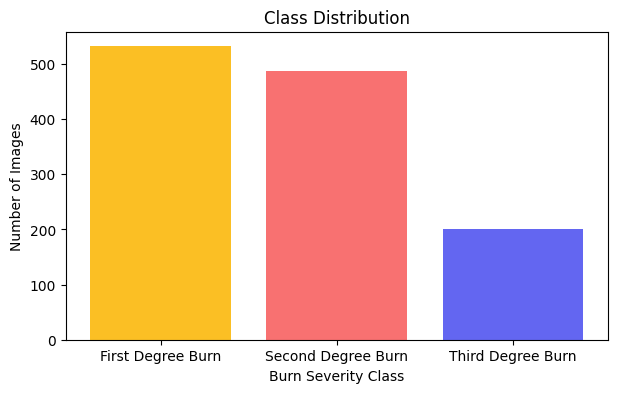

Class counts: {'First Degree Burn': 532, 'Second Degree Burn': 488, 'Third Degree Burn': 201}


In [1]:
# Visualize class distribution and check for imbalance
import matplotlib.pyplot as plt
from collections import Counter
import os
dataset_dir = 'dataset-v2/kaggle-good/archive'
class_map = {'0': 'First Degree Burn', '1': 'Second Degree Burn', '2': 'Third Degree Burn'}
class_counts = Counter()
for label_file in os.listdir(dataset_dir):
    if label_file.endswith('.txt'):
        with open(os.path.join(dataset_dir, label_file), 'r') as f:
            first_line = f.readline()
            if first_line:
                class_id = first_line.strip().split()[0]
                class_counts[class_id] += 1
labels = [class_map.get(cid, 'Unknown') for cid in class_counts.keys()]
counts = [class_counts[cid] for cid in class_counts.keys()]
plt.figure(figsize=(7,4))
plt.bar(labels, counts, color=['#fbbf24', '#f87171', '#6366f1'])
plt.title('Class Distribution')
plt.xlabel('Burn Severity Class')
plt.ylabel('Number of Images')
plt.show()
print('Class counts:', dict(zip(labels, counts)))
min_count = min(counts) if counts else 0
max_count = max(counts) if counts else 0
if max_count > 1.5 * min_count:
    print('Warning: Class imbalance detected! Consider resampling or using class weights.')
else:
    print('No significant class imbalance detected.')

Your class distribution shows some imbalance, especially with "Third Degree Burn" having fewer samples than the other classes. However, this level of imbalance is common in real-world datasets and does not make your dataset unusable.

You can still proceed with training, but you should take steps to address the imbalance for better model performance and fairness. The two most common approaches are:

Use class weights during model training (recommended for deep learning). This tells the model to pay more attention to underrepresented classes.
Resample the dataset (oversample minority class or undersample majority classes), but this can sometimes lead to overfitting or loss of data.
Recommendation:
Continue with your training, but be sure to use class weights in your model's fit() call. This is easy to implement and effective for your situation.